# Introducción al machine learning

**API 3**

**Alumno**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repositorio**: [GitHub](https://github.com/hhvergara/teclab_intro_ml)

### Situación
El RMS Titanic fue, en su momento, el mayor barco de pasajeros del mundo.
Se  hundió  en  su  viaje  inaugural  de  Southampton  a  Nueva  York,  en  el  año
1912. En el evento, fallecieron 1514 de las 2223 personas que iban a bordo,
entre tripulación y pasajeros.
Hoy, en el año 2022, se ha decidido hacer un estudio de machine learning en
el cual se requiere de nuestras labores como técnicos en Data Science, para
identificar  diversos  patrones  que  permitan  verificar  si,  basándonos  en  el
entrenamiento de nuestro modelo de datos, la máquina es capaz de predecir
si una persona logra sobrevivir o no.
Para  ello  se  utilizarán  varias  bases  para  llevar  a  cabo  nuestro  análisis:  las
primeras denominadas “train.csv” y “test.csv”, que pertenecen a un set de
datos de entrenamiento; y otra para testear nuestra información.

### Consignas

El desafío actual consiste en poder generar un modelo de árbol de decisión
que permita calcular el grado de accuracy con el cual se pueda determinar,
en el grupo de prueba, quiénes son los sobrevivientes en la tragedia del
Titanic.

a) Debemos describir brevemente la cantidad de valores faltantes para
cada una de las variables de la base de datos.

b) Completemos aquellas variables que se encuentran faltantes para las
bases de train (“Age”, ”fare”, “Cabin”) y test ( “Age”, “Cabin”,
“embarked”).

c) Ahora, debemos ajustar nuestro primer modelo de árbol de decisión.

d) Finalmente, podemos entrenar y determinar Accuracy, F1-Score,
Recall.


#### 💡 Importamos las librerias y cargamos el dataset que vamos a utilizar:

In [ ]:
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data', 'API2')
filename_train_data = os.path.join(__data_dir__, 'train.csv')
filename_test_data = os.path.join(__data_dir__, 'test.csv')
printing = lambda text: print("\033[92m" + text + "\033[0m")

In [2]:
train_data = pd.read_csv(filename_train_data).sort_values('PassengerId')
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_data = pd.read_csv(filename_test_data).sort_values('PassengerId')
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### a) Visualizamos los valores nulos en el dataset:

In [4]:
# Porcentaje de datos nulos por columna:
100 * (train_data.isnull().sum() / train_data.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
# Porcentaje de datos nulos por columna:
100 * (test_data.isnull().sum() / test_data.shape[0])

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

### B) Reemplazo de valores
Luego de analizar el porcentaje de valores nulos en el dataset, vemos que Cabin tiene un 77.10% de datos faltantes, por lo tanto, es difícil obtener una tendencia con estos datos.
Vamos a imputar las columnas Age y Embarked para cubrir estos faltantes

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## 💡 One Hot Encoder
Teniendo en cuenta que los modelos trabajan con tipos de datos numéricos (int y float) tenemos que llevar los tipos "object" a un formato numérico usando algún método de encoder. Para este caso, utilizamos One Hot Encoder, para proponer algo distinto a lo visto en clase.

In [8]:
def encoder(df: pd.DataFrame, categorical_columns: list):

    df_pandas_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    print(f"One-Hot Encoded Data Usando Pandas:\n{df_pandas_encoded.head(3)}\n")

    # Inicializamos el encoder
    encoder = OneHotEncoder(sparse_output=False)

    # Fit y transform las columnas categoricas:
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])

    encoded_columns = [x for x in encoder.get_feature_names_out(categorical_columns)]

    # Creamos un dataframe con las columnas one-hot encoded:
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_columns)

    # Concatenamos estas nuevas columnas con el dataframe original:
    df = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
    return df, encoded_columns


In [9]:
categorical_columns = ['Sex', 'Embarked']
train_data, train_encoded_columns = encoder(df = train_data, categorical_columns = categorical_columns)
train_data.info()

One-Hot Encoded Data Usando Pandas:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   NaN     False       False        True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int

In [10]:
categorical_columns = ['Sex', 'Embarked']
test_data, test_encoded_columns = encoder(df = test_data, categorical_columns = categorical_columns)
test_data.info()

One-Hot Encoded Data Usando Pandas:
   PassengerId  Pclass                              Name   Age  SibSp  Parch  \
0          892       3                  Kelly, Mr. James  34.5      0      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  47.0      1      0   
2          894       2         Myles, Mr. Thomas Francis  62.0      0      0   

   Ticket    Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0  330911  7.8292   NaN      True        True       False  
1  363272  7.0000   NaN     False       False        True  
2  240276  9.6875   NaN      True        True       False  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5 

In [ ]:
# Imputamos las columnas con nulos para reemplazarlos con los vecinos cercanos
imputer = KNNImputer(n_neighbors=3, weights='uniform')
train_data[['Age'] + train_encoded_columns] = imputer.fit_transform(train_data[['Age'] + train_encoded_columns])

display(train_data.info())
100 * (train_data.isnull().sum() / train_data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Sex_female    891 non-null    float64
 11  Sex_male      891 non-null    float64
 12  Embarked_C    891 non-null    float64
 13  Embarked_Q    891 non-null    float64
 14  Embarked_S    891 non-null    float64
 15  Embarked_nan  891 non-null    float64
dtypes: float64(8), int64(5), object(3)
memory usage: 111.5+ KB


None

PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Age              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin           77.104377
Sex_female       0.000000
Sex_male         0.000000
Embarked_C       0.000000
Embarked_Q       0.000000
Embarked_S       0.000000
Embarked_nan     0.000000
dtype: float64

In [21]:
test_data[['Age', 'Fare'] + test_encoded_columns] = imputer.fit_transform(test_data[['Age', 'Fare'] + test_encoded_columns])
display(test_data.info())
100 * (test_data.isnull().sum() / test_data.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Sex_female   418 non-null    float64
 10  Sex_male     418 non-null    float64
 11  Embarked_C   418 non-null    float64
 12  Embarked_Q   418 non-null    float64
 13  Embarked_S   418 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usage: 45.8+ KB


None

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          78.229665
Sex_female      0.000000
Sex_male        0.000000
Embarked_C      0.000000
Embarked_Q      0.000000
Embarked_S      0.000000
dtype: float64

In [25]:
train_data.sample(5)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
635,636,1,2,"Davis, Miss. Mary",28.0,0,0,237668,13.0000,NaN,1.0,0.0,0.0,0.0,1.0,0.0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,0.0,1.0,0.0,0.0,1.0,0.0
244,245,0,3,"Attalah, Mr. Sleiman",30.0,0,0,2694,7.2250,NaN,0.0,1.0,1.0,0.0,0.0,0.0
380,381,1,1,"Bidois, Miss. Rosalie",42.0,0,0,PC 17757,227.5250,NaN,1.0,0.0,1.0,0.0,0.0,0.0
332,333,0,1,"Graham, Mr. George Edward",38.0,0,1,PC 17582,153.4625,C91,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
test_data.sample(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
288,1180,3,"Mardirosian, Mr. Sarkis",34.333333,0,0,2655,7.2292,F E46,0.0,1.0,1.0,0.0,0.0
39,931,3,"Hee, Mr. Ling",34.166667,0,0,1601,56.4958,NaN,0.0,1.0,0.0,0.0,1.0
60,952,3,"Dika, Mr. Mirko",17.000000,0,0,349232,7.8958,NaN,0.0,1.0,0.0,0.0,1.0
410,1302,3,"Naughton, Miss. Hannah",25.666667,0,0,365237,7.7500,NaN,1.0,0.0,0.0,1.0,0.0
244,1136,3,"Johnston, Master. William Arthur Willie""""",34.166667,1,2,W./C. 6607,23.4500,NaN,0.0,1.0,0.0,0.0,1.0


#### C) Comenzamos a preparar el modelo de regresión logística:

In [12]:
# Seleccionamos las columnas que vamos a usar para el entrenamiento
x, y = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] + train_encoded_columns], train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# Dividimos el conjunto de datos en entrenamiento y validación
seed_number = 28
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=seed_number)

#### D) Entrenamos nuestro modelo:

In [26]:
tree = DecisionTreeClassifier(random_state=seed_number)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

In [28]:
# Predicciones
y_pred = tree.predict(x_val)
tree_acc = accuracy_score(y_val, y_pred)
tree_prec = precision_score(y_val, y_pred)
tree_rec = recall_score(y_val, y_pred)
tree_f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {tree_acc}')
print(f'Precision: {tree_prec}')
print(f'Recall: {tree_rec}')
print(f'F1: {tree_f1}')

Accuracy: 0.7254237288135593
Precision: 0.6636363636363637
Recall: 0.6239316239316239
F1: 0.6431718061674009


### Generamos un gráfico para comparar ambos modelos:

Text(0.5, 1.05, 'Model Performance Metrics')

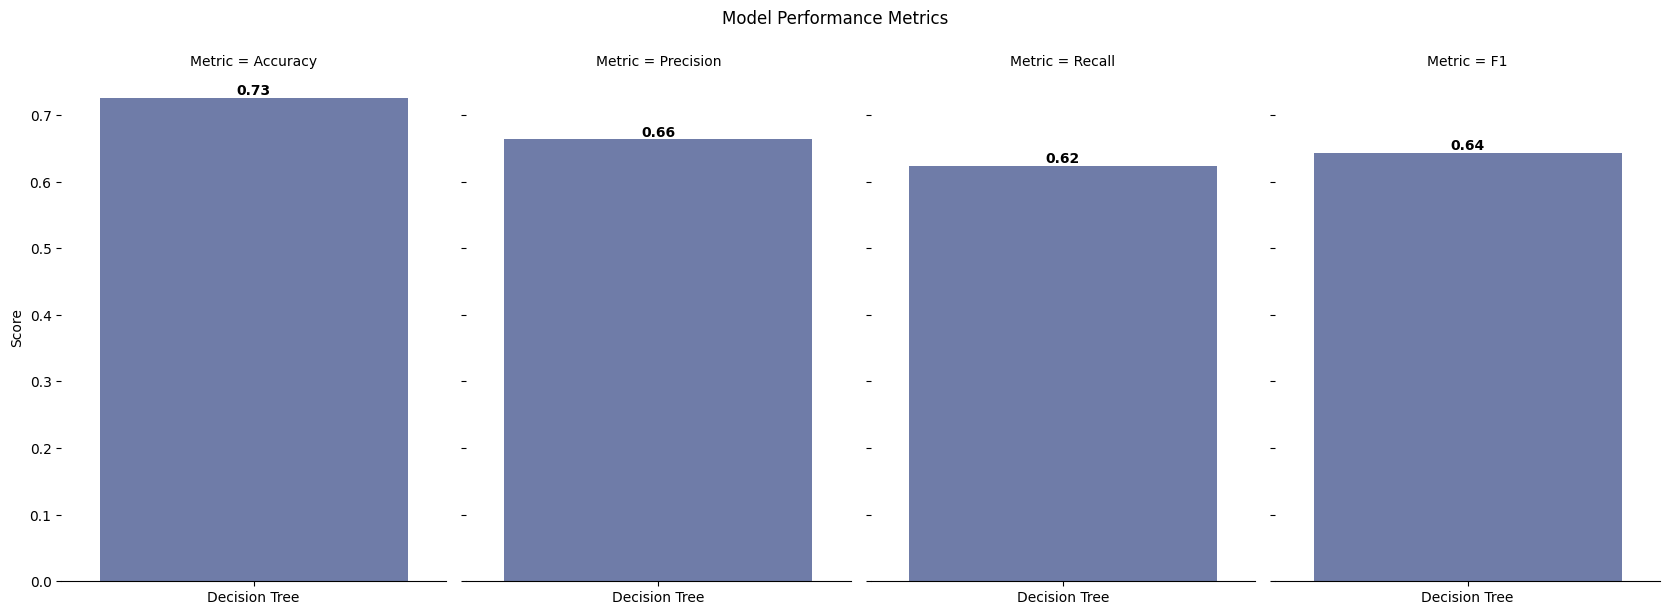

In [30]:
df_accuracy = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [tree_acc],
    'Precision': [tree_prec],
    'Recall': [tree_rec],
    'F1': [tree_f1],
})

# Transforma el dataframe a un formato largo adecuado para FacetGrid
df_melted = df_accuracy.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Crea el gráfico con FacetGrid
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Model", col="Metric",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=0.7
)

# Añade etiquetas numéricas a cada barra
for ax in g.axes.flat:
    for bar in ax.patches:
        # Obtiene la posición de cada barra y su altura para etiquetar
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

# Ajusta los detalles del gráfico
g.despine(left=True)
g.set_axis_labels("", "Score")
g.fig.suptitle("Model Performance Metrics", y=1.05)

## Mejoramos el modelo

In [32]:
# Seleccionamos las columnas que vamos a usar para el entrenamiento
x, y = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] + train_encoded_columns], train_data['Survived']
y

# Dividimos el conjunto de datos en entrenamiento y validación
seed_number = 28
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=seed_number)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=5)